*****Proyecto M.Tomás Martinez*****

# BLACK FRIDAY

![BlackFriday](https://imagenes.eltiempo.com/files/image_379_284/uploads/2024/05/07/663a9d88c906f.jpeg)

Una empresa minorista **ABC Private Limited** desea conocer el comportamiento de compra de los clientes (en concreto, el importe de la compra) en relación con varios productos de diferentes categorías. Han compartido el resumen de compras de varios clientes para productos seleccionados de gran volumen del mes pasado.
El conjunto de datos también contiene datos demográficos del cliente (edad, sexo, estado civil, tipo de ciudad, ciudad en la que reside actualmente), detalles del producto (nombre del producto y categoría del producto) e importe total de la compra del mes pasado.


## Objetivo
La empresa quieren crear un modelo para predecir el importe de compra del cliente en relación con varios productos, lo que les ayudará a crear ofertas personalizadas para los clientes en relación con diferentes productos.


## Data 
* User_ID - ID Usuario
* Product_ID - ID Producto
* Gender - Sexo del usuario
* Age - Edad en bins
* Occupation - Ocupación
* City_Category - Categoría de la ciudad (A,B,C)
* Stay_In_Current_City_Years - Número de años de estancia en la ciudad actual
* Marital_Status - Estado civil
* Product_Category_1 - Categoría del producto
* Product_Category_2 - El producto también puede pertenecer a otra categoría 
* Product_Category_3 - El producto también puede pertenecer a otra categoría 
* Purchase - Importe de la compra 


# Preprocesamiento de los Datos

In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv(r"train.csv")
df.head(11)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


Podemos observar en una primera instancia que: 

+ El DataSet cuenta con valores NaN
+ La variable Age se categoriza por determinados rango de edad 
+ Se tiene que averiguar que significa las variables que tienen las columnas Occupation y City_Category
+ Para su posterir analisis se debera pasar el sexo a variable numericas

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [27]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [28]:
#Paso los valores de Product_Category_2 y Product_Category_3 a Enteros

"""Realizo este paso dado que al ser una lista de las compras de un cliente, 
muchas veces el comportamiento del mismo haga que de la categoria 2 o 3 no se compre nada,
por lo tanto es que el importe de los valores en esa categoria es de Nan lo que equivaldria a $0
"""

df['Product_Category_2'] = df['Product_Category_2'].fillna(0).astype(int)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0).astype(int)


In [29]:
#A su vez tambien voy a pasar los valores categoricos de genero a numericos. Para poder hacer un correcto analisis posterior 
#Debemos tener en cuenta de ahora en mas que 0 = Masculino y 1 = Femenino

df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1}).astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int32 
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int32 
 10  Product_Category_3          550068 non-null  int32 
 11  Purchase                    550068 non-null  int64 
dtypes: int32(3), int64(5), object(4)
memory usage: 44.1+ MB


In [31]:
df.duplicated().sum()

0

In [32]:
df.head(11)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,1,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,1,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,0,55+,16,C,4+,0,8,0,0,7969
5,1000003,P00193542,0,26-35,15,A,3,0,1,2,0,15227
6,1000004,P00184942,0,46-50,7,B,2,1,1,8,17,19215
7,1000004,P00346142,0,46-50,7,B,2,1,1,15,0,15854
8,1000004,P0097242,0,46-50,7,B,2,1,1,16,0,15686
9,1000005,P00274942,0,26-35,20,A,1,1,8,0,0,7871


Obtenemos con este Preprocesamiento de los datos cierto orden en nuestro DataSet, y el trato de los valores nulos

# Estadistica Basica

In [33]:
df.describe().round(2)

,User_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.00,550068.00,550068.00,550068.00,550068.00,550068.00,550068.00,550068.00
mean,1003028.84,0.25,8.08,0.41,5.40,6.74,3.84,9263.97
std,1727.59,0.43,6.52,0.49,3.94,6.22,6.25,5023.07
min,1000001.00,0.00,0.00,0.00,1.00,0.00,0.00,12.00
25%,1001516.00,0.00,2.00,0.00,1.00,0.00,0.00,5823.00
50%,1003077.00,0.00,7.00,0.00,5.00,5.00,0.00,8047.00
75%,1004478.00,0.00,14.00,1.00,8.00,14.00,8.00,12054.00
max,1006040.00,1.00,20.00,1.00,20.00,18.00,18.00,23961.00


In [34]:
print('El Promedio de Gastos de los Clientes es: $',df['Purchase'].mean().round(2))

El Promedio de Gastos de los Clientes es: $ 9263.97


In [35]:
#Quise averiguar algo que me genero dudas acerca del Pago Maximo que se ha efectuado
ingreso_Max = df.loc[df['Purchase'] == 23961]
ingreso_Max

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
87440,1001474,P00052842,0,26-35,4,A,2,1,10,15,0,23961
93016,1002272,P00052842,0,26-35,0,C,1,0,10,15,0,23961
370891,1003160,P00052842,0,26-35,17,C,3,0,10,15,0,23961


3 Veces se ha dado que han comprado con el importe mayor. Cuestiones a tener en cuenta los tres son Hombres entre 26-35 años. 

Repitiendo ademas comportamientos en las categorias de compras. Al parecer las demas Variables en este caso no tienen mucho sentido de correlacion 

In [36]:
"""CARDINALIDAD DE MIS DATOS

La Cardinalidad en la ciencia de datos se utiliza para describir la cantidad de valores únicos que puede tener una variable.
La cardinalidad es importante porque influye en la selección y eficiencia de los algoritmos de análisis de datos, 
variables con alta cardinalidad pueden ser más difíciles de manejar y requerir técnicas especiales de preprocesamiento.
"""


Car = pd.DataFrame({'Cantidad': df.nunique(), 'Porcentaje': (df.nunique())/ (df.shape[0]) * (100)})
Car

,Cantidad,Porcentaje
User_ID,5891,1.070958
Product_ID,3631,0.660100
Gender,2,0.000364
Age,7,0.001273
Occupation,21,0.003818
City_Category,3,0.000545
Stay_In_Current_City_Years,5,0.000909
Marital_Status,2,0.000364
Product_Category_1,20,0.003636
Product_Category_2,18,0.003272


+ Podemos aprecirar que de los 550068 datos que tenemos de compra porvienen de 5891 clientes registrados en nuestra tienda.

+ A su vez contamos con 3631 diferentes productos 

+ Y que la columna Age se divide en 7 diferentes categorias 

+ Tenemos los datos de 21 diferentes Ocupacion de nuestros clientes 

+ Y las categorias estan divididas de entre 16 a 20 productos 

# Visualizacion de los Datos

In [37]:
"""Realizo la carga del Dataset nuevamente solo para analizar las columnas de Categoria de porductos ya que 
anteriormente en el preprocesamiento ya las trate por lo que quiero visualizar los datos tal cual estaban en el Dataset Orignal"""

Eda = pd.read_csv(r"train.csv")

### Analisis Univariado

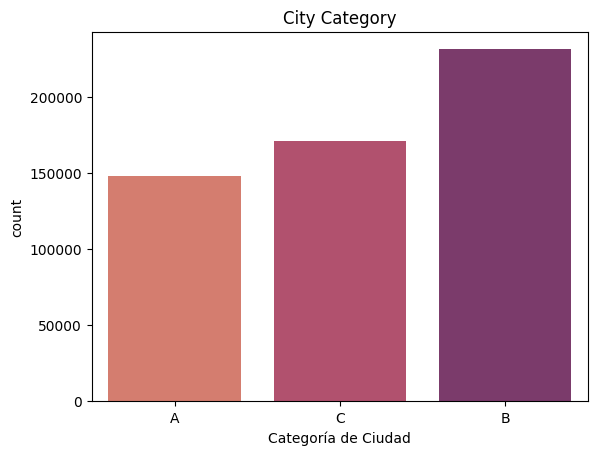

In [38]:
sns.countplot(x='City_Category', data=df,hue='City_Category', palette='flare')
plt.title('City Category')
plt.xlabel('Categoría de Ciudad')

plt.show()

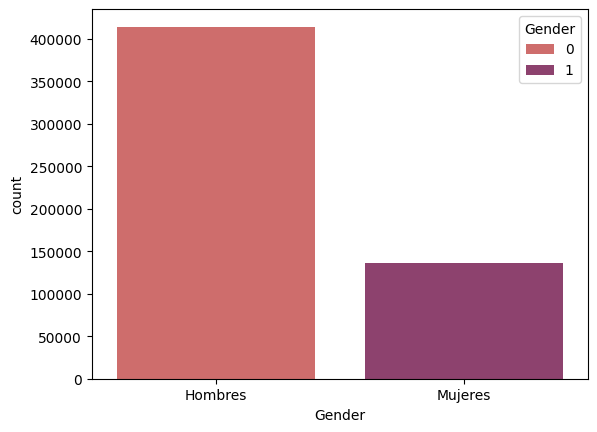

In [39]:
sns.countplot(x='Gender',hue='Gender', data=df, palette='flare')
plt.xticks([0,1],['Hombres', 'Mujeres'])
plt.show()

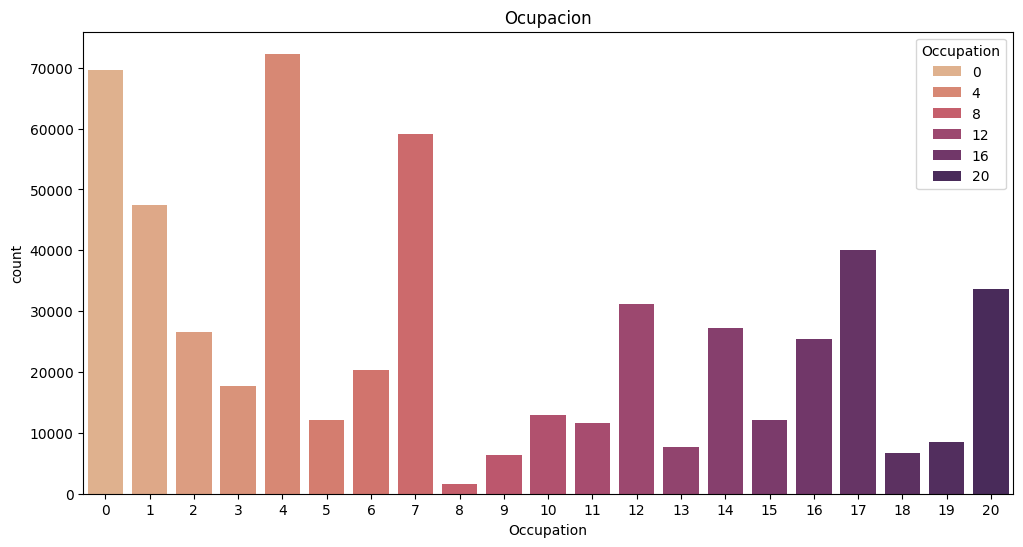

In [40]:
Fig,ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(data=df,x='Occupation',hue='Occupation', palette='flare')
plt.title('Ocupacion')
plt.show()

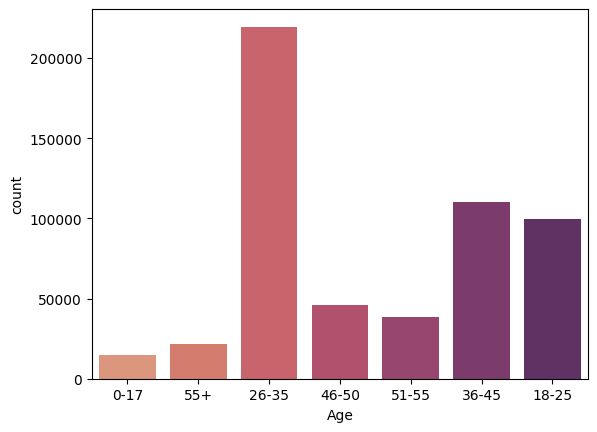

In [41]:
sns.countplot(data=df,x='Age', hue= 'Age', palette='flare')
plt.show()

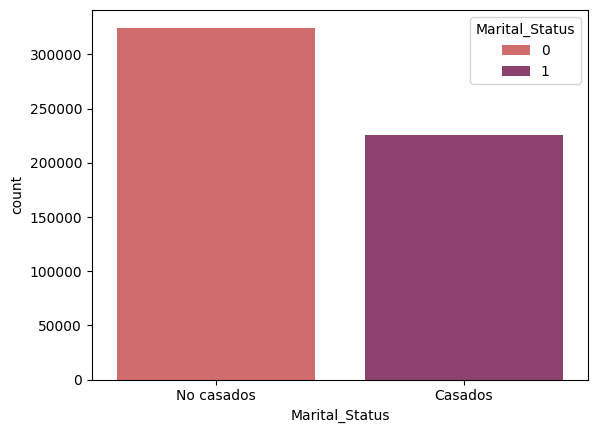

In [42]:
sns.countplot(data=df,x='Marital_Status', hue='Marital_Status', palette='flare')
plt.xticks([0,1],['No casados','Casados'])
plt.show()

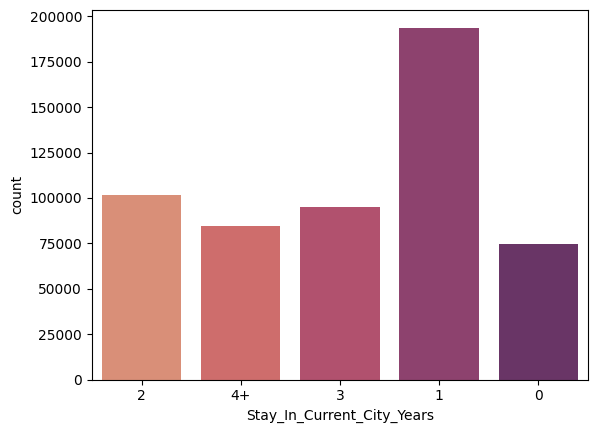

In [43]:
sns.countplot(data=df, x='Stay_In_Current_City_Years',hue='Stay_In_Current_City_Years', palette='flare')
plt.show()

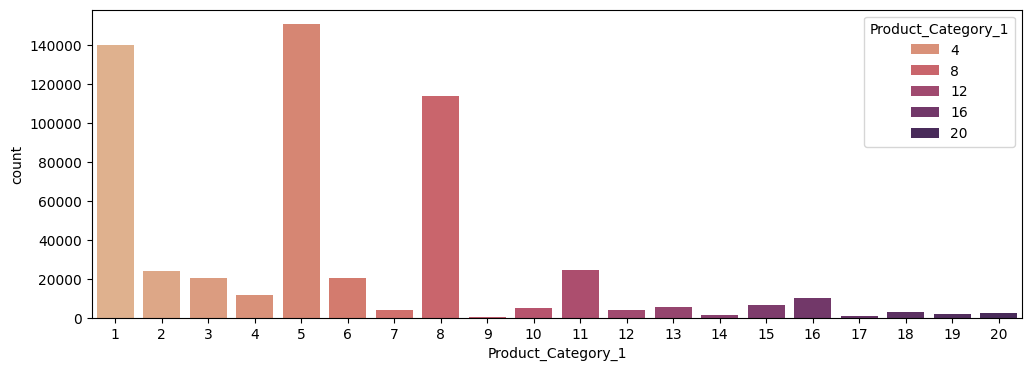

In [44]:
#Aca uso el dataset que cree nuevamente llamado Eda
fig,ax=plt.subplots(figsize=(12,4))
ax= sns.countplot(data=Eda,x='Product_Category_1',hue='Product_Category_1',palette='flare')
plt.show()

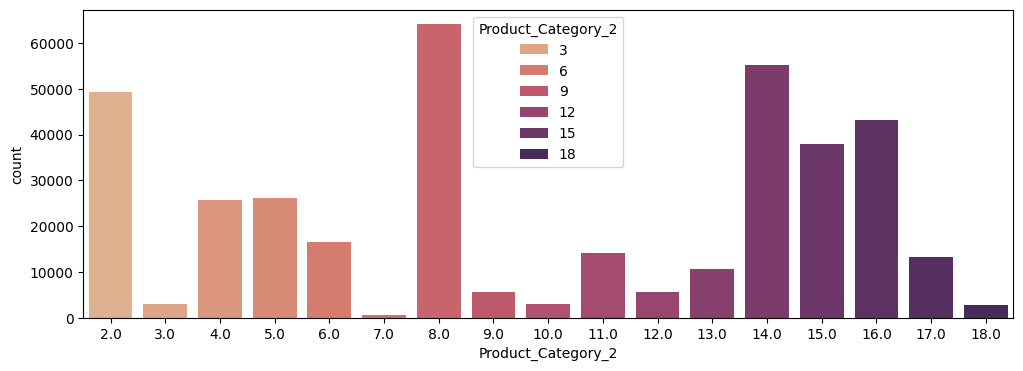

In [45]:
fig,ax=plt.subplots(figsize=(12,4))
ax=sns.countplot(data=Eda,x='Product_Category_2',hue='Product_Category_2',palette='flare')
plt.show()

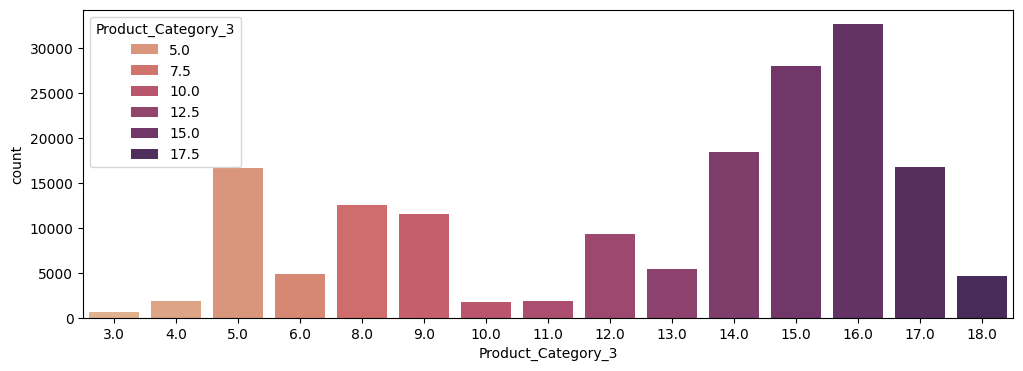

In [46]:
fig,ax=plt.subplots(figsize=(12,4))
ax=sns.countplot(data=Eda,x='Product_Category_3',hue='Product_Category_3',palette='flare')
plt.show()

### Analisis Bivariado

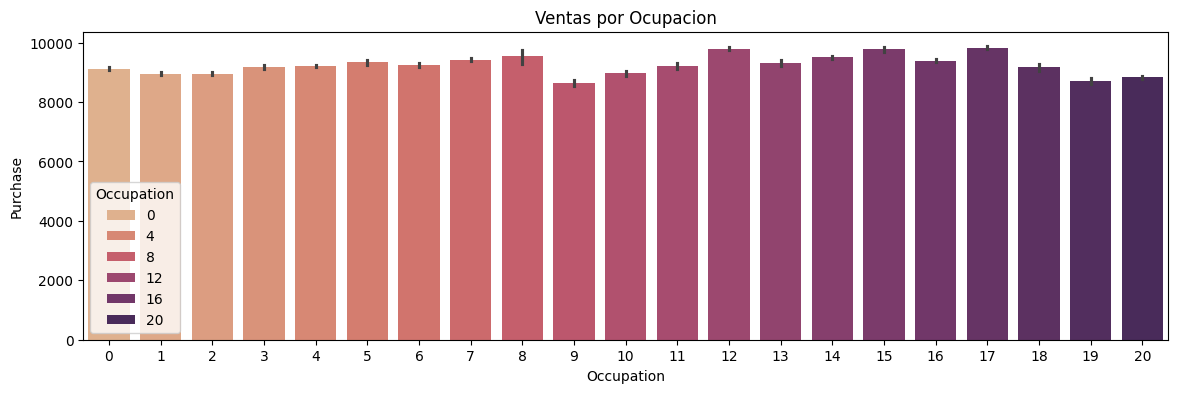

In [47]:
# Ventas vs Ocupacion

fig,ax = plt.subplots(figsize=(14,4))
ax = sns.barplot(data=df, x='Occupation', y='Purchase', hue='Occupation', palette='flare')
ax.set_title('Ventas por Ocupacion')
plt.show()

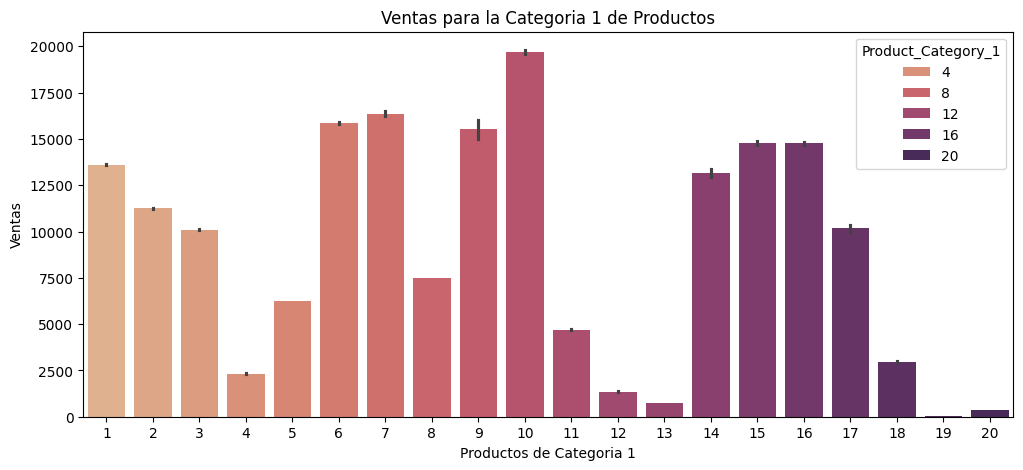

In [48]:
# Ventas para la Categoria 1 de Productos

fig,ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(data=df, x='Product_Category_1', y='Purchase', hue='Product_Category_1',palette='flare')
ax.set_xlabel('Productos de Categoria 1')
ax.set_ylabel('Ventas')
ax.set_title('Ventas para la Categoria 1 de Productos')
plt.show()

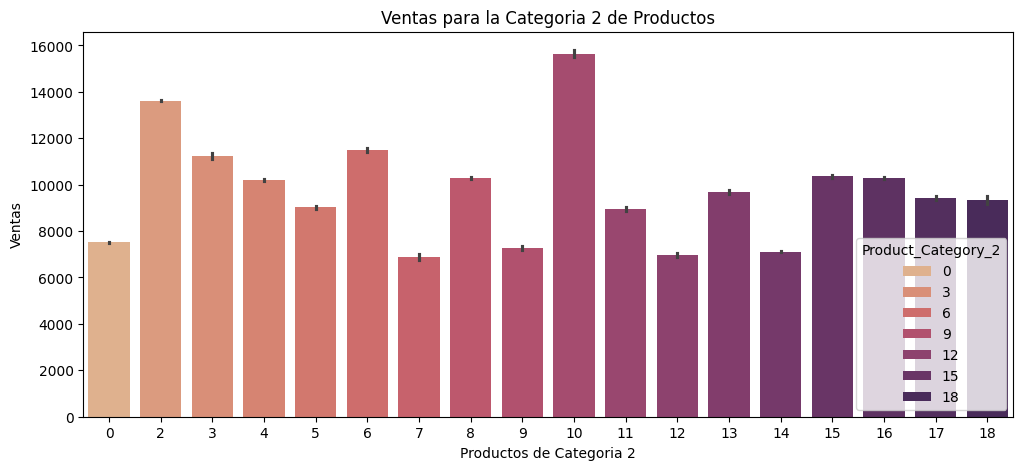

In [49]:
# Ventas para la Categoria 2 de Productos

fig,ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(data=df, x='Product_Category_2', y='Purchase', hue='Product_Category_2',palette='flare')
ax.set_xlabel('Productos de Categoria 2')
ax.set_ylabel('Ventas')
ax.set_title('Ventas para la Categoria 2 de Productos')
plt.show()

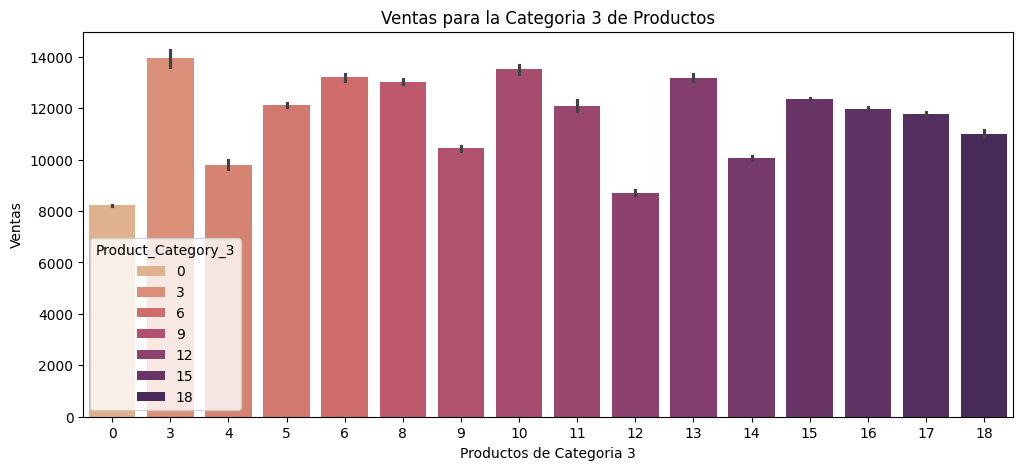

In [50]:
# Ventas para la Categoria 3 de Productos

fig,ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(data=df, x='Product_Category_3', y='Purchase', hue='Product_Category_3',palette='flare')
ax.set_xlabel('Productos de Categoria 3')
ax.set_ylabel('Ventas')
ax.set_title('Ventas para la Categoria 3 de Productos')
plt.show()

In [51]:
"¿Que Productos se vende más a los hombre? ¿Y cuales a las Mujeres? ¿Existe diferencia si la persona esta casada o no?"

Homb = df[df['Gender']==1] # Se realiza el filtrado del Dataset mediante solo los Clientes que sean Hombres, sin importar otra condicion
Muj = df[df['Gender']==0] #Se realiza el filtrado del Dataset mediante solo los Clientes que sean Mujeres, sin importar otra condicion

#A esos dos filtrados a su vez se le suma la cantidad de ventas de las distintas categorias de Productos 
Ventas_por_Cat_H = Homb[['Product_Category_1','Product_Category_2','Product_Category_3']].sum() 
Ventas_por_Cat_M = Muj[['Product_Category_1','Product_Category_2','Product_Category_3']].sum()

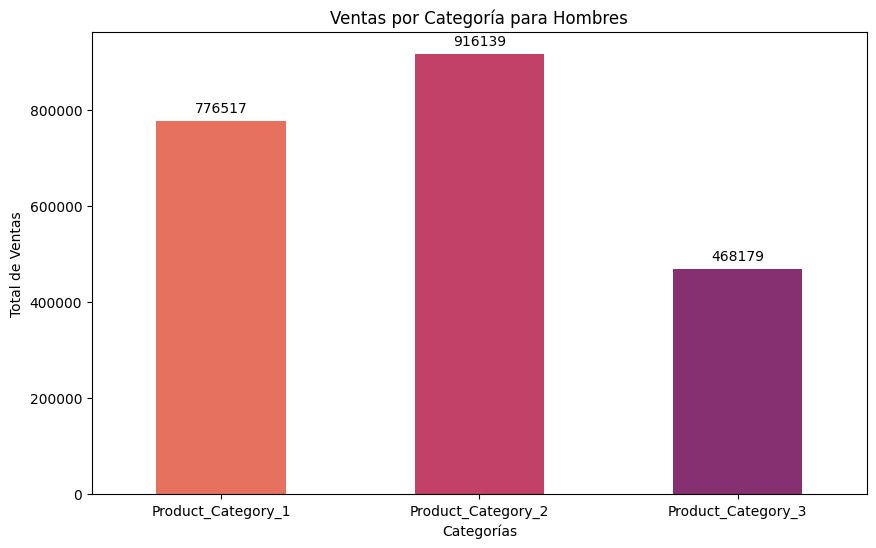

In [52]:
palette = sns.color_palette("flare", len(Ventas_por_Cat_H))

plt.figure(figsize=(10, 6))
ax = Ventas_por_Cat_H.plot(kind='bar',color=palette)
plt.title('Ventas por Categoría para Hombres')
plt.xlabel('Categorías')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

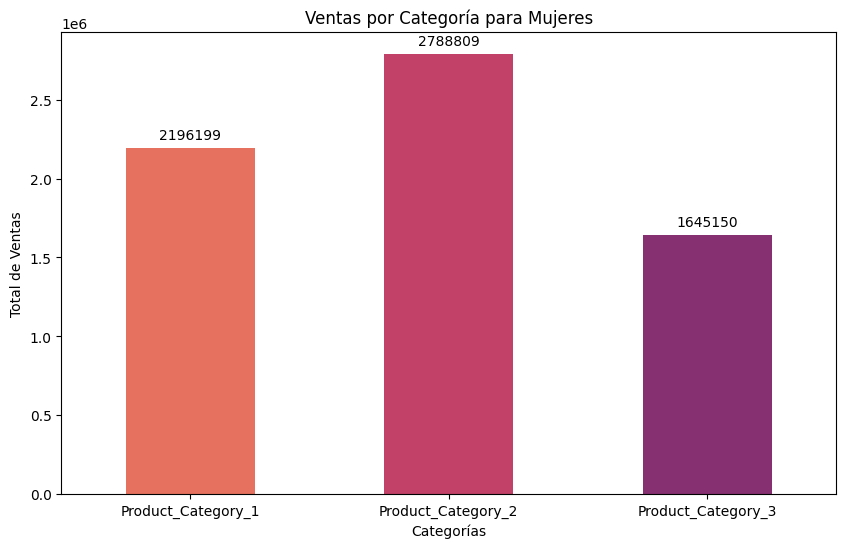

In [53]:
plt.figure(figsize=(10, 6))
ax = Ventas_por_Cat_M.plot(kind='bar',color= palette)

plt.title('Ventas por Categoría para Mujeres')
plt.xlabel('Categorías')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

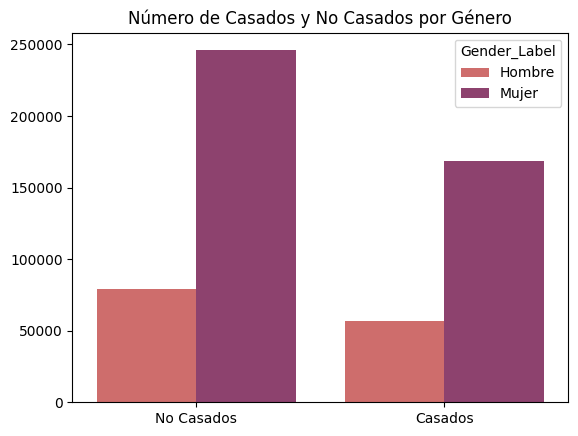

In [54]:
df['Gender_Label'] = df['Gender'].map({1: 'Hombre', 0: 'Mujer'})
df['Marital_Status_Label'] = df['Marital_Status'].map({1: 'Casados', 0: 'No Casados'})

sns.countplot(x='Marital_Status_Label', hue='Gender_Label', data=df, palette='flare')
plt.title('Número de Casados y No Casados por Género')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [55]:
Hom_casados = df[(df['Gender'] == 1) & (df['Marital_Status'] == 1)]
Muj_casados = df[(df['Gender'] == 0) & (df['Marital_Status'] == 1)]

Homb_no_casados = df[(df['Gender'] == 1) & (df['Marital_Status'] == 0)]
Muj_no_casados = df[(df['Gender'] == 0) & (df['Marital_Status'] == 0)]

Ventas_por_Cat_H_casados = Hom_casados[['Product_Category_1','Product_Category_2','Product_Category_3']].sum() 
Ventas_por_Cat_M_casadas = Muj_casados[['Product_Category_1','Product_Category_2','Product_Category_3']].sum()

Ventas_por_Cat_H_no_casados = Homb_no_casados[['Product_Category_1','Product_Category_2','Product_Category_3']].sum() 
Ventas_por_Cat_M_no_casadas = Muj_no_casados[['Product_Category_1','Product_Category_2','Product_Category_3']].sum()


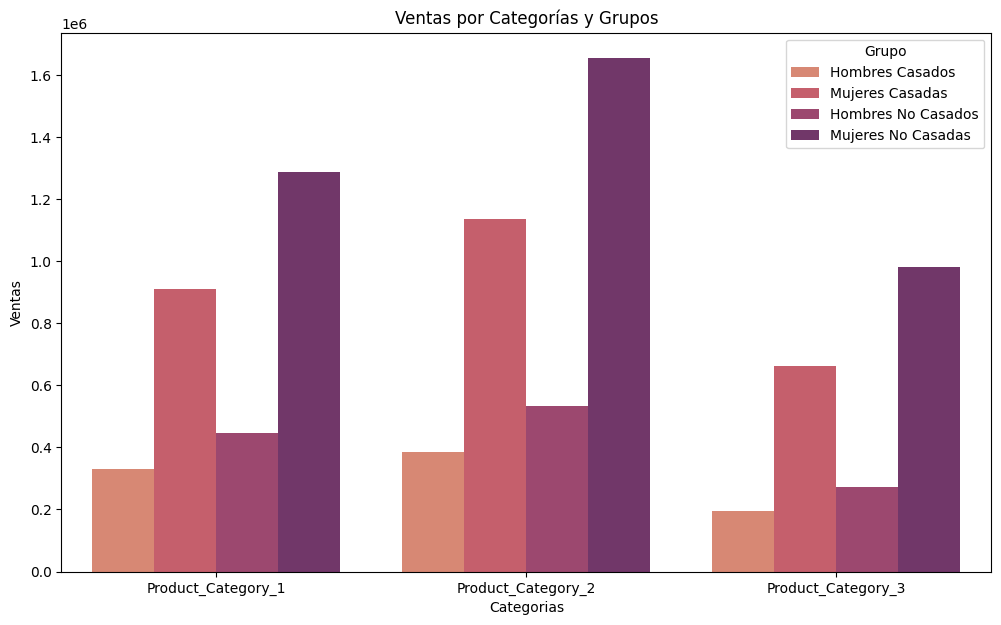

In [56]:
df_ventas = pd.DataFrame({
    'Categorias': ['Product_Category_1', 'Product_Category_2', 'Product_Category_3'],
    'Hombres Casados': Ventas_por_Cat_H_casados.values,
    'Mujeres Casadas': Ventas_por_Cat_M_casadas.values,
    'Hombres No Casados': Ventas_por_Cat_H_no_casados.values,
    'Mujeres No Casadas': Ventas_por_Cat_M_no_casadas.values
})

df_ventas_grafica = df_ventas.melt(id_vars='Categorias', var_name='Grupo', value_name='Ventas')

plt.figure(figsize=(12, 7))
sns.barplot(x='Categorias', y='Ventas', hue='Grupo', data=df_ventas_grafica, errorbar=None, palette='flare')
plt.title('Ventas por Categorías y Grupos')
plt.show()

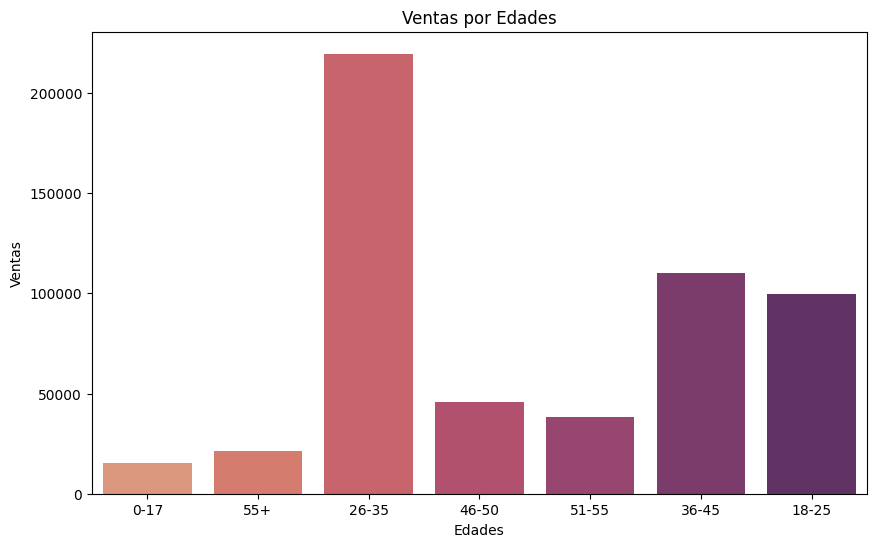

In [57]:
#Ventas vs Edades

fig,ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(data=df, x='Age', hue='Age',palette='flare')
ax.set_xlabel('Edades')
ax.set_ylabel('Ventas')
ax.set_title('Ventas por Edades')
plt.show()

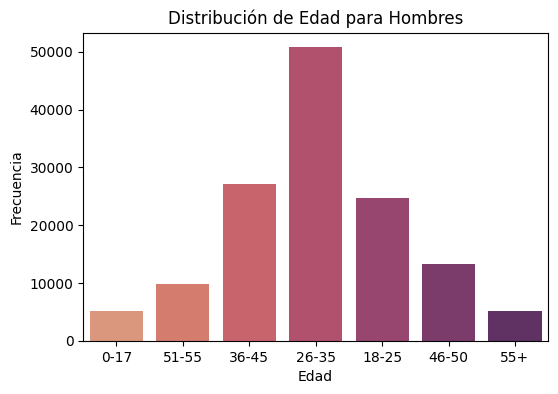

In [58]:
#¿Cuales edades de MUjeres y Hombres gastan más y menos?

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=Homb, x='Age', hue='Age',palette='flare') 

plt.title('Distribución de Edad para Hombres')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

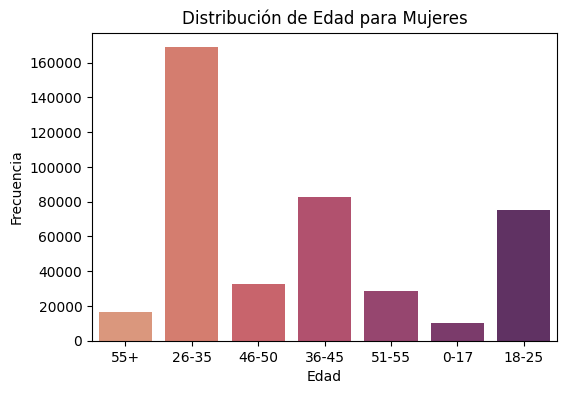

In [59]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=Muj, x='Age', hue='Age',palette='flare') 

plt.title('Distribución de Edad para Mujeres')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

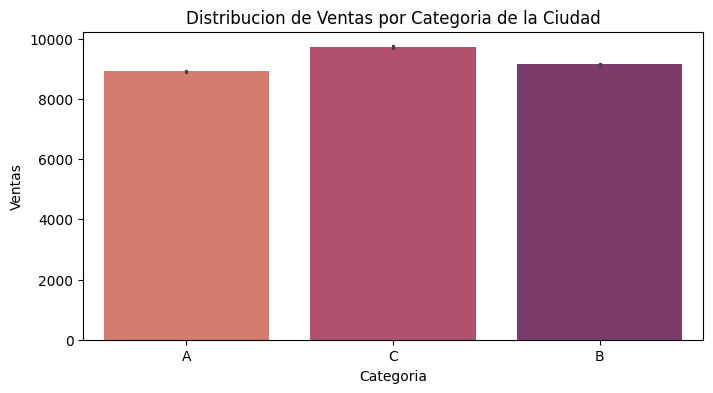

In [60]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=df, x='City_Category', y='Purchase',hue='City_Category',palette='flare')

ax.set_title('Distribucion de Ventas por Categoria de la Ciudad')
ax.set_xlabel('Categoria')
ax.set_ylabel('Ventas')
plt.show()

Quiero saber cuanto gastan en promedio la mujeres que tiene entre 26 y 35 años y no son casadas, dado que este grupo dada la informacion es el grupo de clientes que realiza más compras en nuestra tienda

In [61]:
grupo = (df['Gender'] == 1) & (df['Age'] == '26-35') & (df['Marital_Status'] == 0)
Mujeres = df[grupo]
promedio = Mujeres['Purchase'].mean().round(2)

print(f"El gasto promedio de las Mujeres que tienen entre 26 y 35 años y no están casadas es de: ${promedio}")

El gasto promedio de las Mujeres que tienen entre 26 y 35 años y no están casadas es de: $8595.27


In [62]:
grupo_H = (df['Gender'] == 0) & (df['Age'] == '26-35') & (df['Marital_Status'] == 0)
Hombres = df[grupo_H]
promedio_H = Hombres['Purchase'].mean().round(2)

print(f"El gasto promedio de los Hombres que tienen entre 26 y 35 años y no están casadas es de: ${promedio_H}")

El gasto promedio de los Hombres que tienen entre 26 y 35 años y no están casadas es de: $9444.1


En este caso podemos apreciar que el Promedio no seria tan buen indicador para este estudio dado que por los graficos podemos ver que en realidad el grupo de Mujeres son la que gastan más, lo que sucede aqui es que los datos de los Hombres pueden estar sesgados por compras de mayor valor que superan la media(Como es el caso que vimos anteriormente en el cual las tres compras mas grandes en pago la hicieron 3 hombres de entre 26 y 35 años y dos de ellos no eran casados). Por lo que serian en este casos Outliers lo que genera un numero tan grande o mayor que el grupo de las Mujeres, dado que se aleja del promedio o del IQR (Rango Intercuartil. En Realidad supera el limite superior es decir es Outliers).

In [63]:
grupo = (df['Gender'] == 1) & (df['Age'] == '26-35') & (df['Marital_Status'] == 0)
Mujeres = df[grupo]
promedio = Mujeres['Purchase'].median().round(2)

print(f"La Media en gastos de las Mujeres que tienen entre 26 y 35 años y no están casadas es de: ${promedio}")

La Media en gastos de las Mujeres que tienen entre 26 y 35 años y no están casadas es de: $7852.5


In [64]:
grupo_H = (df['Gender'] == 0) & (df['Age'] == '26-35') & (df['Marital_Status'] == 0)
Hombres = df[grupo_H]
promedio_H = Hombres['Purchase'].median().round(2)

print(f"La Media en gastos de los Hombres que tienen entre 26 y 35 años y no están casadas es de: ${promedio_H}")

La Media en gastos de los Hombres que tienen entre 26 y 35 años y no están casadas es de: $8087.0


Se Concluye entonces con la idea de que el grupo de Mujeres realiza más compras pero gasta menos que los hombres, Y por el contrario el comportamiento de los Hombres(entre 26 y 35 y no casado) es comprar menos pero gastar más al efectuar esas compras minoritarias al grupo femenino semejante en condiciones.

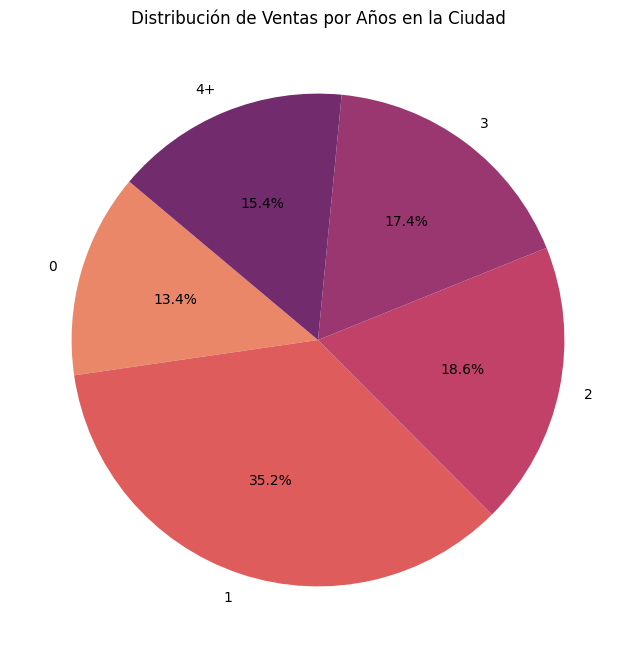

In [65]:
df_grouped = df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index() #Agrupo los datos necesario para la visualizacion posterior y los agergo a un nuevo DataFrame

fig, ax = plt.subplots(figsize=(8, 8))
colors = sns.color_palette('flare', len(df_grouped))
ax.pie(df_grouped['Purchase'], labels=df_grouped['Stay_In_Current_City_Years'], colors=colors, autopct='%1.1f%%', startangle=140)
ax.set_title('Distribución de Ventas por Años en la Ciudad')
plt.show()

Las personas que llevan un Año en la Ciudad gastan más que lo demas grupo de persona, en algunos caso más que el doble (0,3 y +4). La diferencia en este Aspecto es notable.


Hipotesis: Las personas que ya se han Instalado en la ciudad o saben que van a seguir viviendo allí, tienden a gastar más dado que saben que van a pertenecer a ese sitio por más tiempo(sumado tambien a su estilo de vida anterior a mudarse).


Una vez el tiempo pasa el consumo va bajando en Correlacion a ello(Estadia y gasto). 

# Distribucion de los Datos

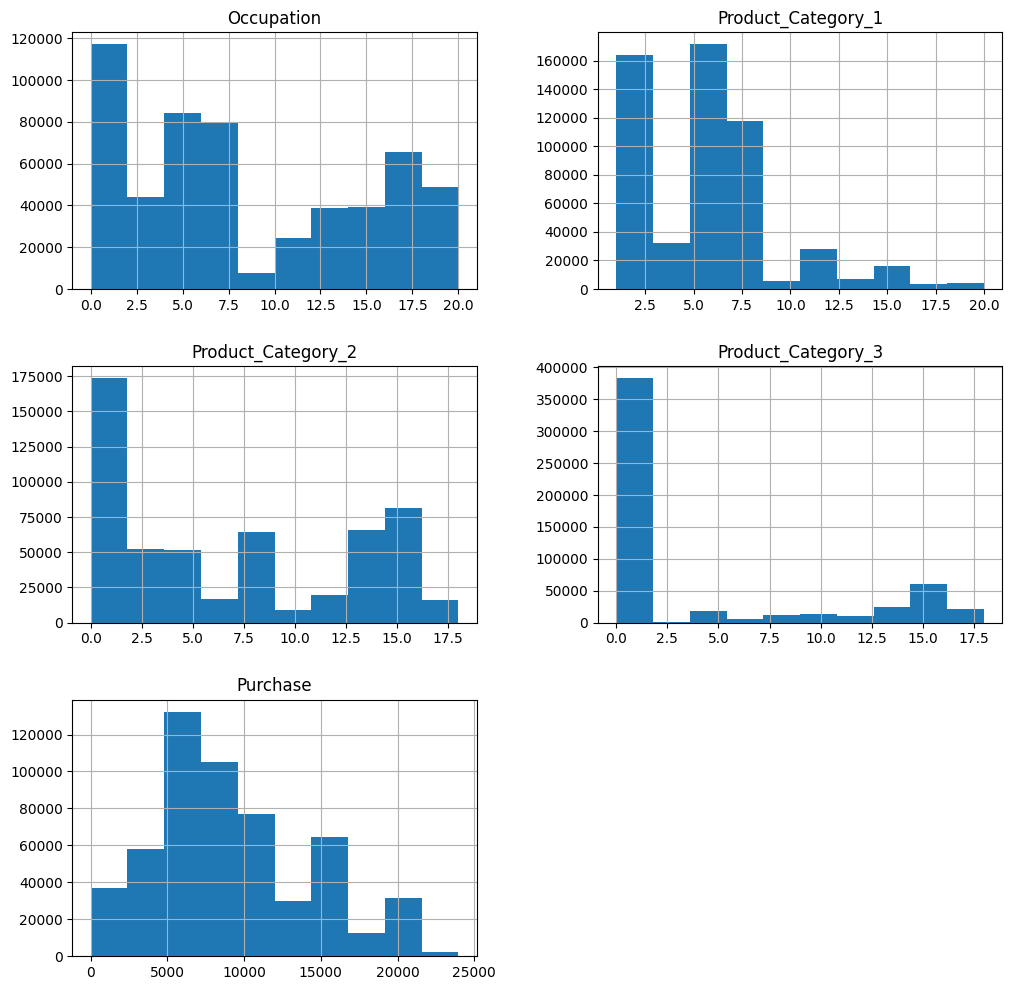

In [66]:
distribucion = df.columns.drop(['User_ID','Gender','Marital_Status'])
df[distribucion].hist(figsize=(12,12))
plt.show()

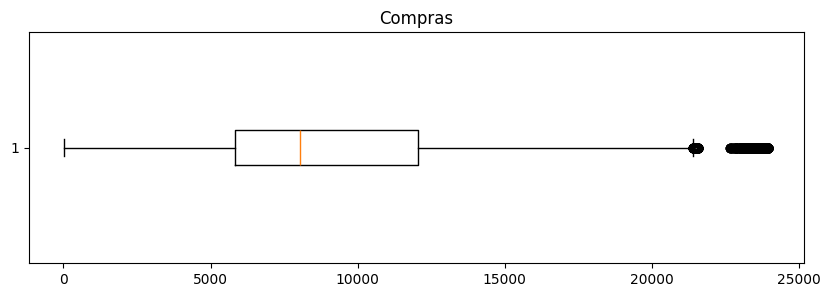

In [67]:
fig, ax = plt.subplots(figsize= (10,3))
ax= plt.boxplot(x= df['Purchase'], vert=False)
plt.title('Compras')
plt.show()

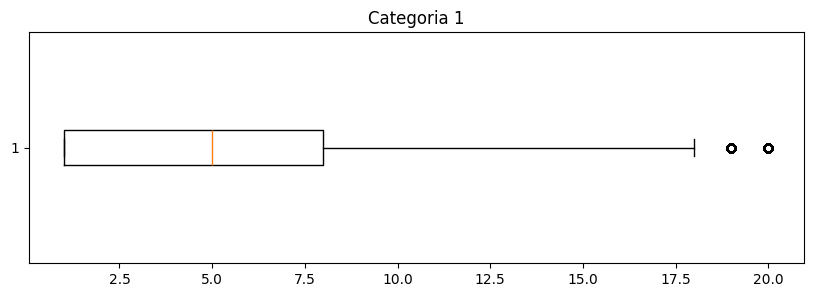

In [68]:
fig, ax = plt.subplots(figsize= (10,3))
ax= plt.boxplot(x= df['Product_Category_1'], vert=False)
plt.title('Categoria 1')
plt.show()

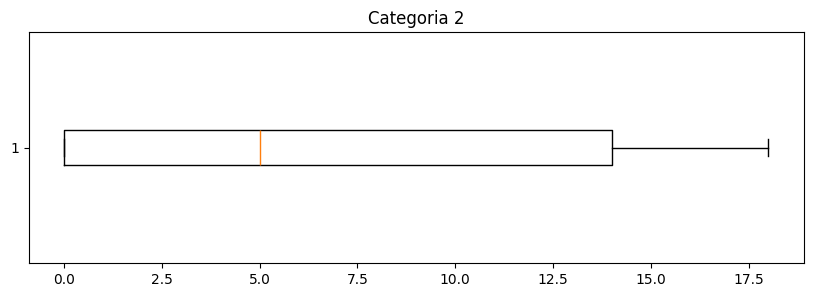

In [69]:
fig, ax = plt.subplots(figsize= (10,3))
ax= plt.boxplot(x= df['Product_Category_2'], vert=False)
plt.title('Categoria 2')
plt.show()

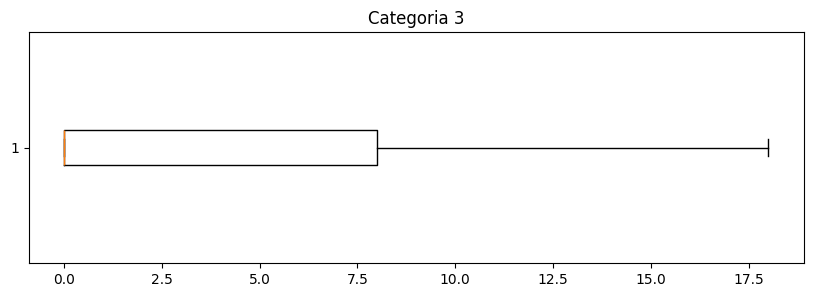

In [70]:
fig, ax = plt.subplots(figsize= (10,3))
ax= plt.boxplot(x= df['Product_Category_3'], vert=False)
plt.title('Categoria 3')
plt.show()

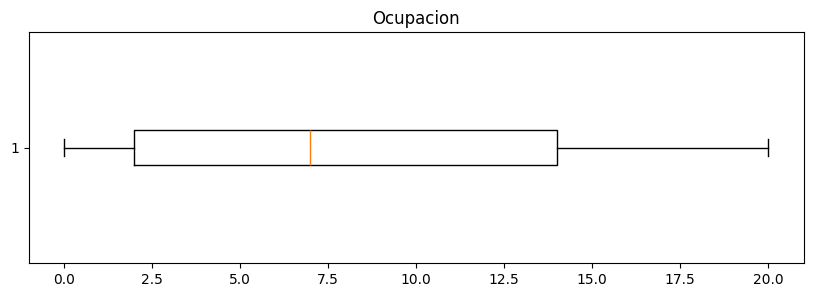

In [71]:
fig, ax = plt.subplots(figsize= (10,3))
ax= plt.boxplot(x= df['Occupation'], vert=False)
plt.title('Ocupacion')
plt.show()

En este caso se Mantedran los Outliers dado que:

Contexto de Negocio: Los Outliers reflejan compras legítimas de productos más caros, es importante mantenerlos, ya que representan comportamientos reales de los clientes. Estos valores pueden ser clave para entender las preferencias de ciertos segmentos de clientes.


Segmentación: Se pueden si se tiene como objetivo tambien analizar los outliers para identificar y analizar un segmento de clientes que realiza compras de mayor valor. Lo que puede ayudar a personalizar campañas de marketing o promociones para estos clientes que su comportamiento de consumo es diferente.


Ademas es posible que conservar estos outliers mejore la precisión del modelo en la predicción de compras de alto valor.

# Modelado

In [72]:
"Primero eliminaremos campos innecesarios para el Analisis de nuestro modelo, como lo son User_id,Product_ID,Gender_Label,Marital_Status_Label"

Mol_Df = df.drop(columns=['User_ID', 'Product_ID','Gender_Label','Marital_Status_Label'])
Mol_Df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0-17,10,A,2,0,3,0,0,8370
1,1,0-17,10,A,2,0,1,6,14,15200
2,1,0-17,10,A,2,0,12,0,0,1422
3,1,0-17,10,A,2,0,12,14,0,1057
4,0,55+,16,C,4+,0,8,0,0,7969


In [73]:
from sklearn.preprocessing import LabelEncoder

cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']

le = LabelEncoder()

for col in cols:
    Mol_Df[col] = le.fit_transform(Mol_Df[col])
Mol_Df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,0,0,8370
1,1,0,10,0,2,0,1,6,14,15200
2,1,0,10,0,2,0,12,0,0,1422
3,1,0,10,0,2,0,12,14,0,1057
4,0,6,16,2,4,0,8,0,0,7969


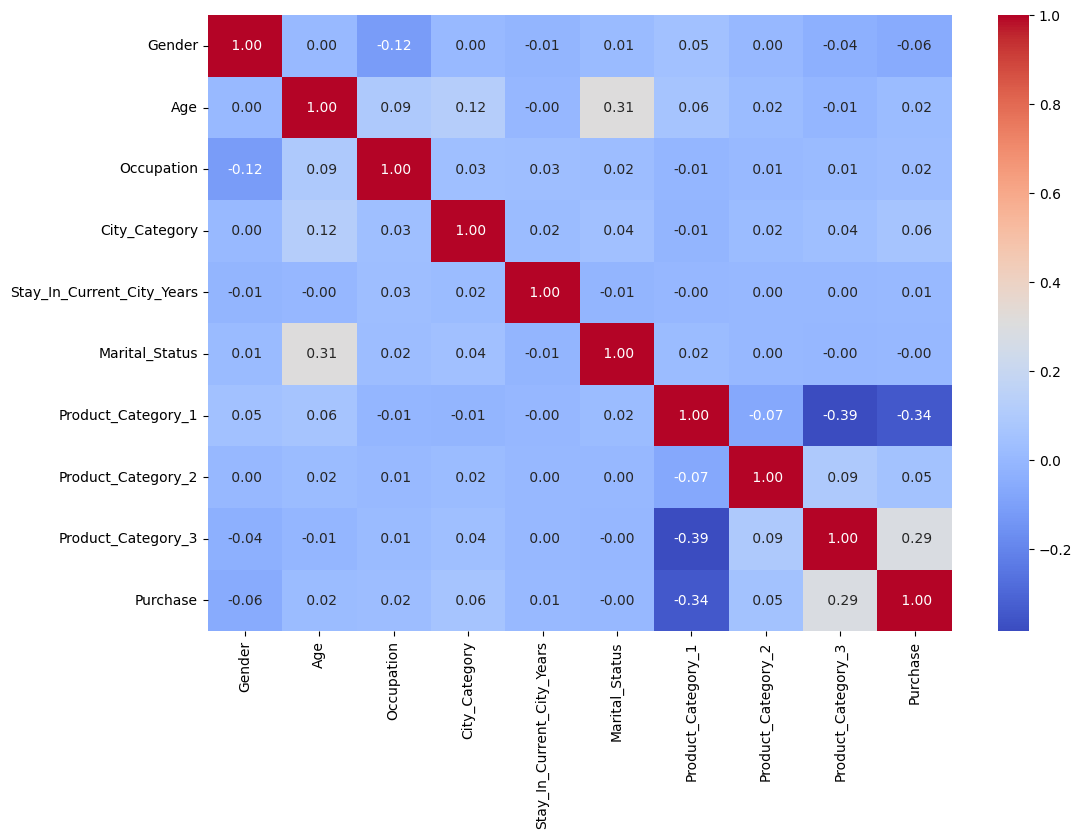

In [74]:
Cor_Matriz = Mol_Df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(Cor_Matriz, annot=True, cmap='coolwarm', fmt=' .2f')
plt.show()

**Correlaciones Bajas:**


+ Gender: Correlación muy baja (-0.060346) con Purchase
+ Age: Correlación baja (0.015839) con Purchase
+ Occupation: Correlación baja (0.020833) con Purchase
+ City_Category: Correlación baja (0.061914) con Purchase
+ Stay_In_Current_City_Years: Correlación muy baja (0.005422) con Purchase
+ Marital_Status: Correlación muy baja (-0.000463) con Purchase

**A tener en Cuenta:**

+ Product_Category_1 y Product_Category_3: Alta correlación negativa (-0.343703) con Purchase, sugiriendo que un mayor valor en Product_Category_1 tiende a estar asociado con menores valores en Product_Category_3 en las compras.
+ Product_Category_2 y Product_Category_3: Relación positiva (0.094750) con Product_Category_3, pero aún no es muy fuerte.
+ Product_Category_1 y Product_Category_2: Baja correlación (-0.067877), indicando que la relación entre estas dos categorías de productos es débil.

+ Edad: Muestra una correlación moderada (0.311738) con Marital_Status, sugiriendo que la edad puede estar asociada con el estado civil.
+ Edad y City_Category: Correlación positiva (0.123079), lo que sugiere una ligera asociación entre la edad y la categoría de ciudad.

+ City_Category: Correlación baja con Purchase (0.061914), indicando que la categoría de ciudad no tiene una fuerte relación con el importe de compra.

+ Product_Category_2 y Product_Category_3: Alta correlación positiva (0.288501) con Product_Category_3, lo que indica que cuando los valores en Product_Category_2 aumentan, los valores en Product_Category_3 tienden a aumentar también, aunque la relación no es extremadamente fuerte.

In [75]:
from sklearn.model_selection import train_test_split

X = Mol_Df.drop(columns='Purchase')
y = Mol_Df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [77]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import root_mean_squared_error

# Predicciones
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Evaluación
print("Linear Regression - RMSE:", root_mean_squared_error(y_test, y_pred_lr))
print("Random Forest - RMSE:", root_mean_squared_error(y_test, y_pred_rf))
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Random Forest - MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Linear Regression - R²:", r2_score(y_test, y_pred_lr))
print("Random Forest - R²:", r2_score(y_test, y_pred_rf))


Linear Regression - RMSE: 4618.695144021097
Random Forest - RMSE: 3062.1726330465826
Linear Regression - MAE: 3526.59109646699
Random Forest - MAE: 2227.5180463368606
Linear Regression - R²: 0.15099132139602234
Random Forest - R²: 0.626807526845143


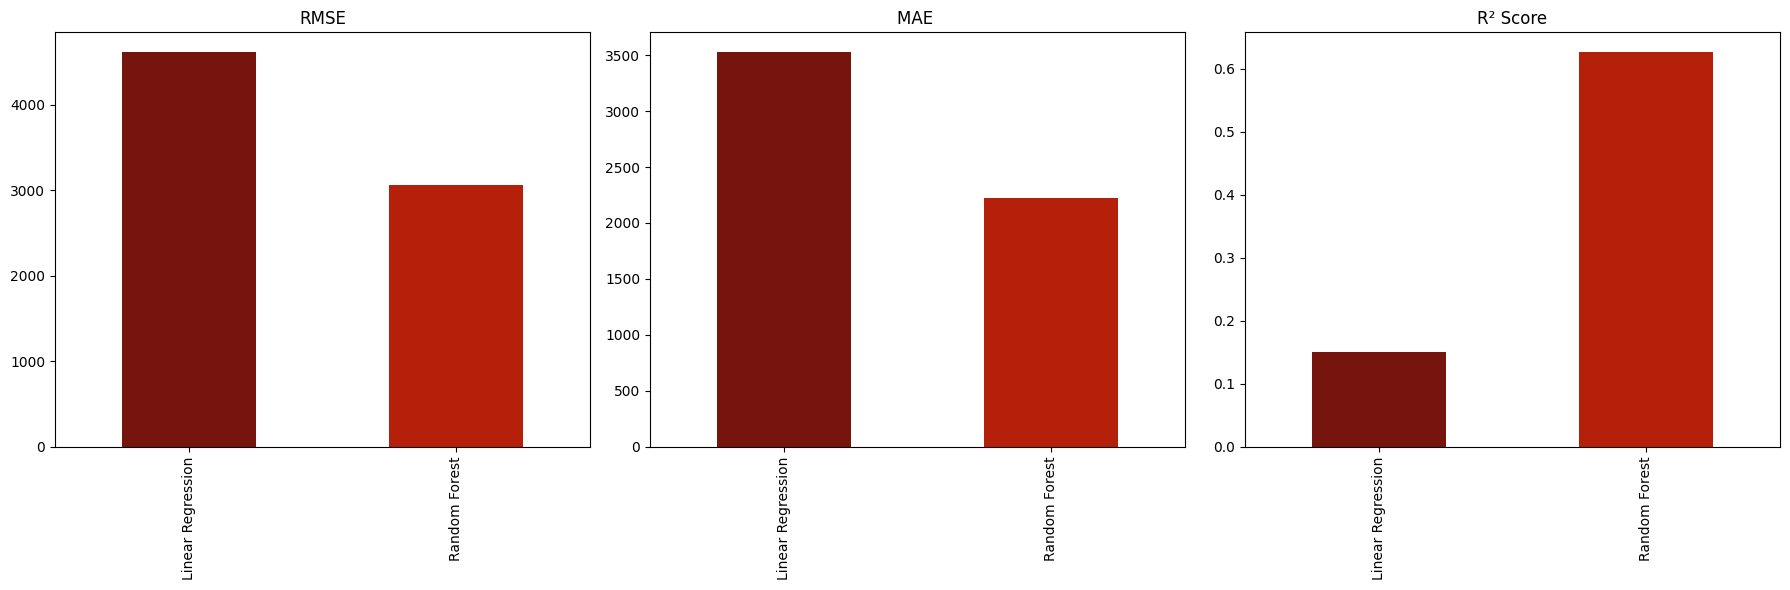

In [79]:
# Uso las Predicciones
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Métricas de evaluación , creo un diccionario
metrics = {
    'Metric': ['RMSE', 'MAE', 'R²'],
    'Linear Regression': [
        root_mean_squared_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_lr),
        r2_score(y_test, y_pred_lr)
    ],
    'Random Forest': [
        root_mean_squared_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_rf),
        r2_score(y_test, y_pred_rf)
    ]
}

# Convertir a DataFrame
metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(18, 6))

# RMSE
plt.subplot(1, 3, 1)
rmse_scores = metrics_df.set_index('Metric').loc['RMSE']
rmse_scores.plot(kind='bar', color=['#76150d', '#b42009'], ax=plt.gca())
plt.title('RMSE')

# MAE
plt.subplot(1, 3, 2)
mae_scores = metrics_df.set_index('Metric').loc['MAE']
mae_scores.plot(kind='bar', color=['#76150d', '#b42009'], ax=plt.gca())
plt.title('MAE ')

# R²
plt.subplot(1, 3, 3)
r2_scores = metrics_df.set_index('Metric').loc['R²']
r2_scores.plot(kind='bar', color=['#76150d', '#b42009'], ax=plt.gca())
plt.title('R² Score')

plt.tight_layout()
plt.show()

**Podemos concluir que el Modelo que mejor resulta es el Random Forest dado que:**

+ El RMSE mide la magnitud promedio del error en las predicciones, con unidades iguales a las de la variable objetivo (importe de compra). Un RMSE más bajo indica que el modelo está haciendo mejores predicciones en promedio.

El modelo de Random Forest tiene un RMSE significativamente más bajo que el de Regresión Lineal, lo que sugiere que Random Forest está haciendo predicciones más precisas y con menos error en promedio.

+ El MAE mide la magnitud promedio del error absoluto en las predicciones. Al igual que el RMSE, un MAE más bajo indica mejor rendimiento.

El MAE también es más bajo para el modelo de Random Forest, lo que refuerza la idea de que Random Forest tiene un mejor desempeño en términos de error absoluto medio.

+ El R2  mide la proporción de la varianza en la variable objetivo que es explicada por el modelo. 
Un valor de 𝑅2 cercano a 1 indica que el modelo explica bien la variabilidad de la variable objetivo, mientras que un valor cercano a 0 sugiere que el modelo no está explicando bien la variabilidad.

El modelo de Random Forest tiene un R2 mucho más alto, indicando que explica una mayor proporción de la variabilidad en el importe de compra. Esto significa que Random Forest captura mejor la relación entre las características y la variable objetivo en comparación con la regresión lineal.

+ **Resumen Final:**

Random Forest se desempeña mejor que la Regresión Lineal en todos los aspectos de las métricas evaluadas (RMSE, MAE y 𝑅2).

La Regresión Lineal parece tener un rendimiento inferior, explicando menos la variabilidad en los datos y generando predicciones con mayor error.

# **Pasos a seguir:**
+ Probar con distintos Modelos para las Predicciones
+ Se puede mejorar estos modelos probando Cross Validation o Hiperparametros para ajustar aun más los modelos y encontrar consecuentemente mejores resultados en ellos. 